# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/tushartuteja/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

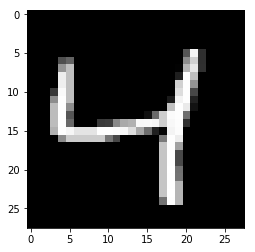

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6864
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6768
Epoch: 1/20... Training loss: 0.6701
Epoch: 1/20... Training loss: 0.6631
Epoch: 1/20... Training loss: 0.6538
Epoch: 1/20... Training loss: 0.6436
Epoch: 1/20... Training loss: 0.6331
Epoch: 1/20... Training loss: 0.6202
Epoch: 1/20... Training loss: 0.6070
Epoch: 1/20... Training loss: 0.5938
Epoch: 1/20... Training loss: 0.5786
Epoch: 1/20... Training loss: 0.5619
Epoch: 1/20... Training loss: 0.5444
Epoch: 1/20... Training loss: 0.5237
Epoch: 1/20... Training loss: 0.5106
Epoch: 1/20... Training loss: 0.4923
Epoch: 1/20... Training loss: 0.4748
Epoch: 1/20... Training loss: 0.4588
Epoch: 1/20... Training loss: 0.4447
Epoch: 1/20... Training loss: 0.4263
Epoch: 1/20... Training loss: 0.4158
Epoch: 1/20... Training loss: 0.3962
Epoch: 1/20... Training loss: 0.3833
Epoch: 1/20... Training loss: 0.3693
E

Epoch: 1/20... Training loss: 0.2006
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1886
E

Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1530
E

Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1294
E

Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1230
E

Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1106
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1159
E

Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1084
E

Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.0987
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1006
E

Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1022
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0948
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1003
E

Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0927
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0970
E

Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0876
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0886
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.1000
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

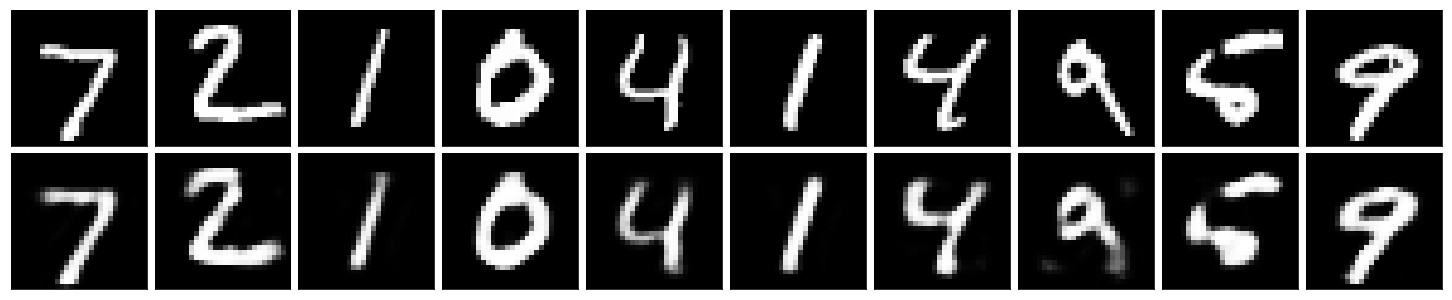

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.